In [1]:
%matplotlib inline
from sys import path
import os
my_home = os.popen("echo $MYWORK_DIR").readlines()[0][:-1]
path.append('%s/work/mylib/' % my_home)

import numpy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from plot_tool import Image_Plot
import tool_box
import h5py

In [2]:
source = "debug"

config_path = "%s/work/envs/envs.dat"%my_home
total_path, para_path = tool_box.config(config_path, ['get', 'get'],
                                                   [['selection_bias', "%s_path"%source, '1'],
                                                    ['selection_bias', "%s_path_para"%source, '1']])
print(total_path)

/mnt/ddnfs/data_users/hkli/simu_test/


/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex2_1.5/mag_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex3_1.5/mag_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex4_1.5/mag_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex2_1.5/snr_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex3_1.5/snr_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex4_1.5/snr_auto/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex2_1.5/sex_snr/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex3_1.5/sex_snr/total.hdf5
/mnt/ddnfs/data_users/hkli/simu_test/result/cuts/sym/sex4_1.5/sex_snr/total.hdf5


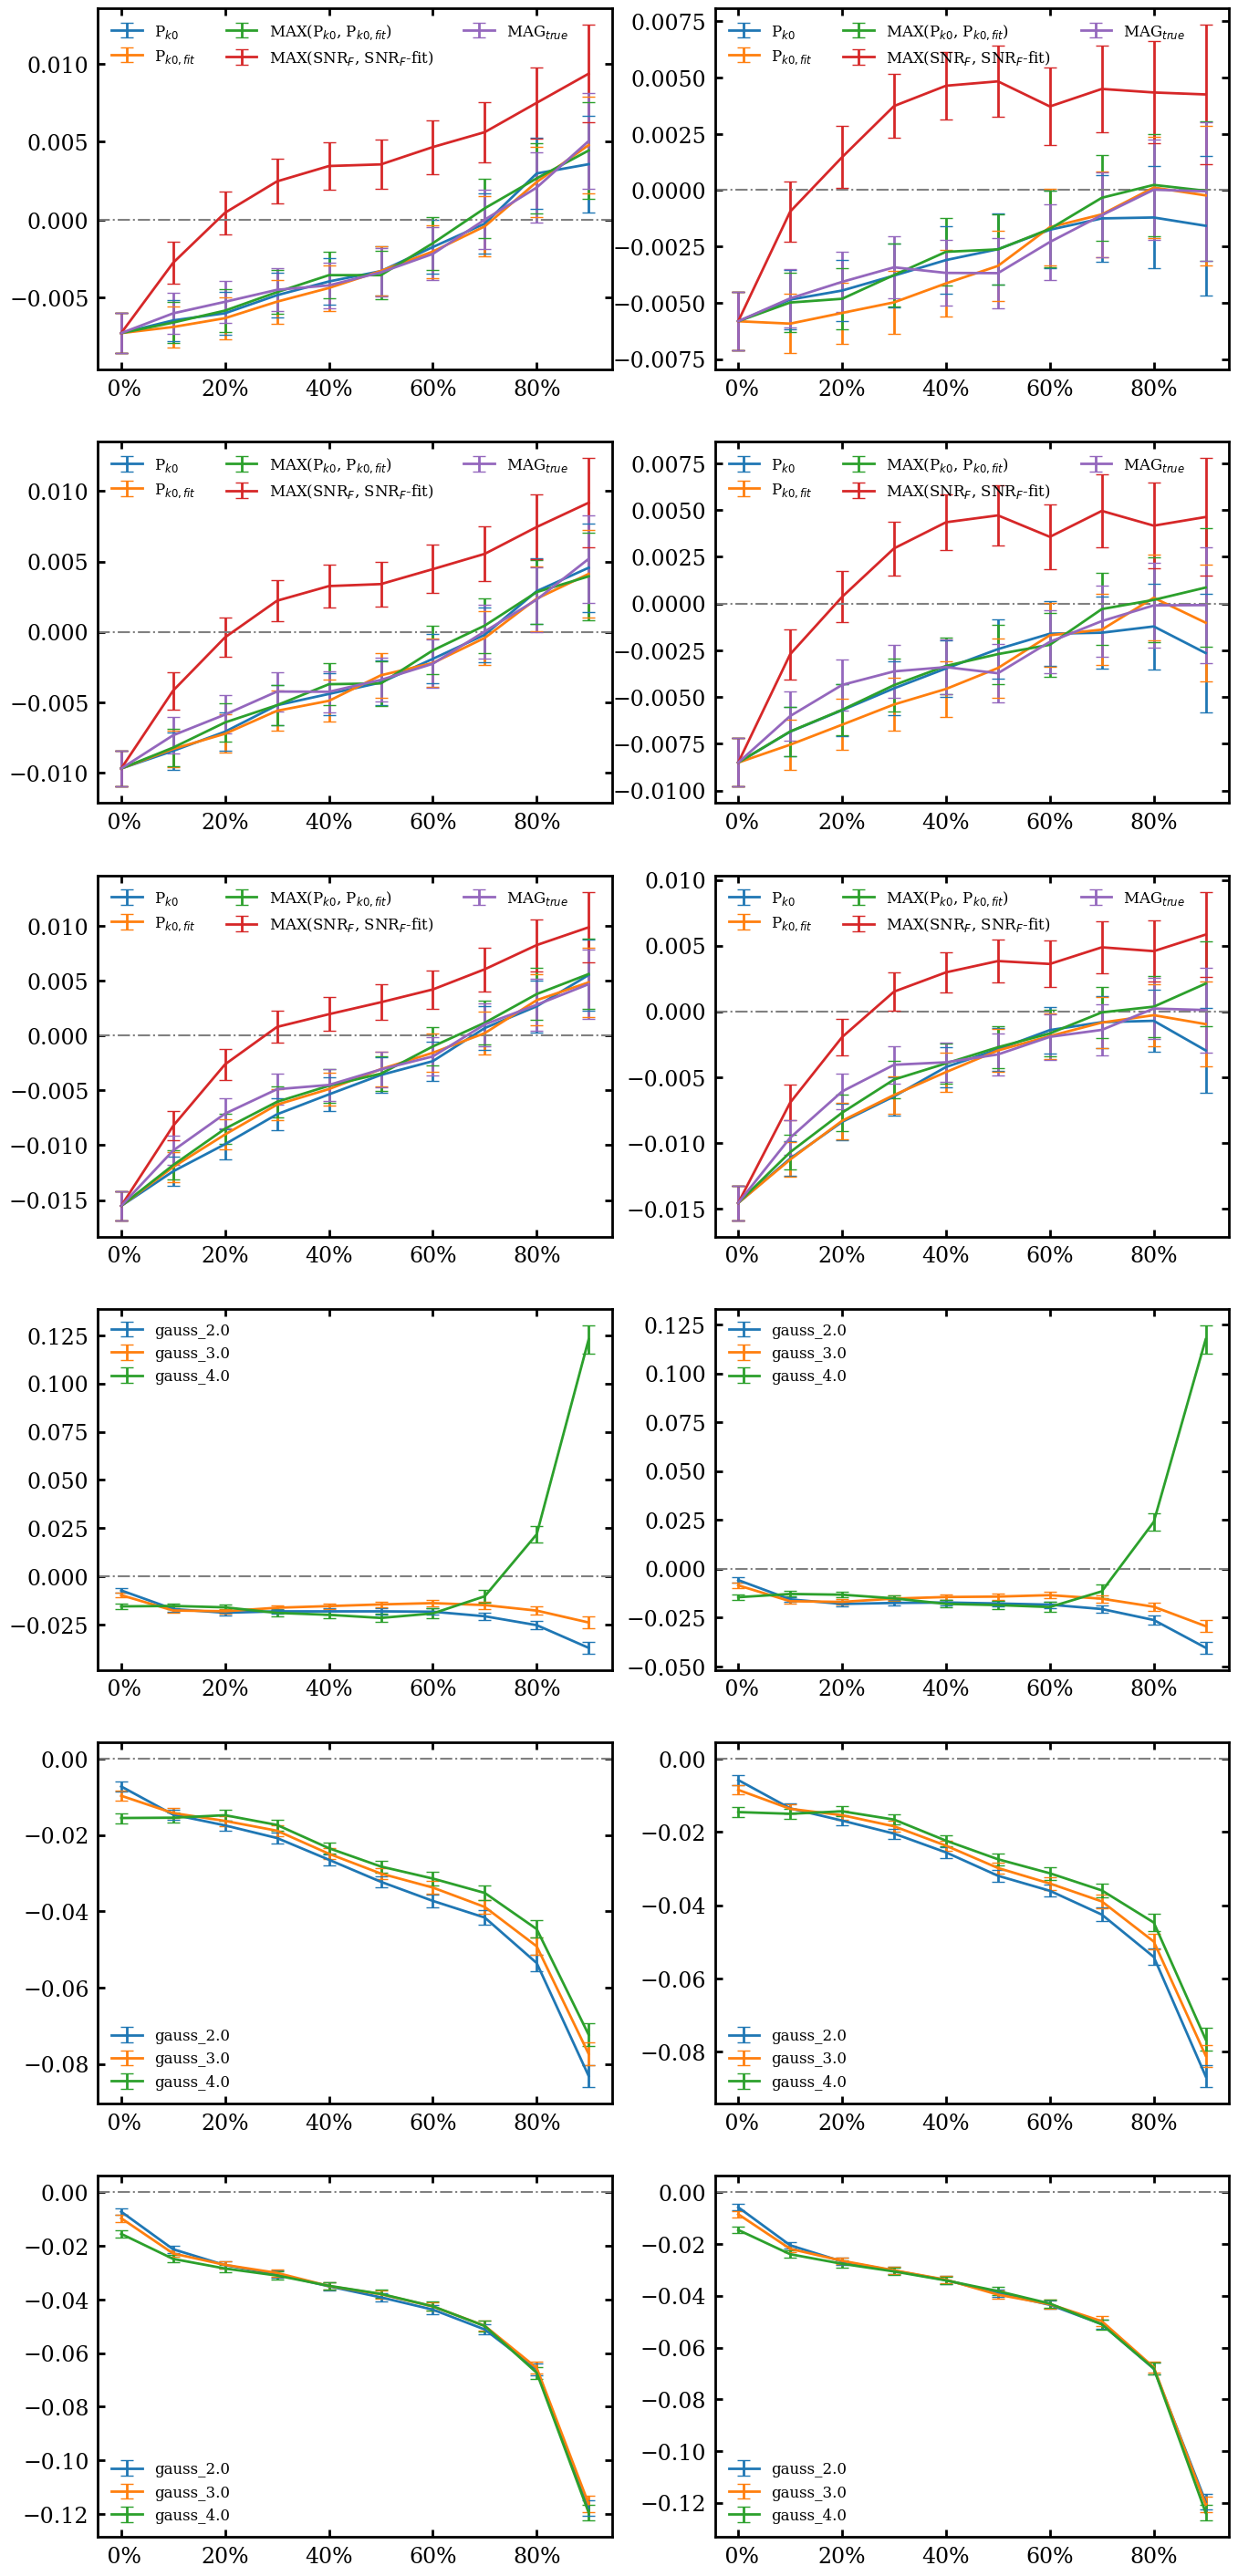

In [3]:
sig = "1.5"
mc_plot = 'm'

lim = 0
if mc_plot == "m":
    plot_tag = 0
    stand = 1
else:
    plot_tag = 2
    stand = 0

xfmt = '%2.f%%'

names = ["P$_{k0}$", "P$_{k0,fit}$", "MAX(P$_{k0}$, P$_{k0,fit}$)", "MAX(SNR$_F$, SNR$_F$-fit)", "MAG$_{true}$"]
files = ["flux2_ex1","flux2_ex2", "flux2_ex3", "flux2_ex4", "flux2_ex5"]
sex_files = ["mag_auto", "snr_auto","sex_snr"]
gauss_name = ["gauss_2.0","gauss_3.0","gauss_4.0"]

ch_num = 9
cuts_num = 10
x_coord = [i * cuts_num for i in range(ch_num)]
ch = numpy.arange(cuts_num)
ylabels = ["m$_1 \\times 10^2$", "m$_2 \\times 10^2$", "m$_1 \\times 10^2$", "m$_2 \\times 10^2$"]

filter_names = ["sex2_","sex3_",  "sex4_"]

img = Image_Plot()
img.set_style()
img.plot_img(6,2)

for row in range(6):
        if row < 3:
            for tag, file_nm in enumerate(files):
                data_path = total_path + "result/cuts/sym/%s%s/%s/total.hdf5"%(filter_names[row], sig, file_nm)
                h5f = h5py.File(data_path,"r")                
#                 print(data_path)
                for col in range(2):
    #                 hdf5: "/mc1", "/mc2", "/shear", "num"
                    data = h5f["/mc%d"%(col+1)].value
    #                 [[m],[m_sig],[c],[c_sig]]
                    pts_show = data[:,ch][plot_tag]
                    pts_err = data[:,ch][plot_tag+1]
                    img.axs[row][col].errorbar(ch*10.,pts_show, pts_err, linewidth=img.plt_line_width,capsize=img.cap_size, ms=5, label=names[tag])
                    if tag == 0:
                        xs = img.axs[row][col].set_xlim()
                        img.axs[row][col].plot([xs[0], xs[1]],[0,0], linestyle="-.", c='grey')
                    img.axis_major_formatter(row, col, 1, xfmt)
                    img.axs[row][col].legend(ncol=3,fontsize=img.legend_size-5,frameon=False)
                h5f.close()
        else:
            for tag, filter_nm in enumerate(filter_names):
                data_path = total_path + "result/cuts/sym/%s%s/%s/total.hdf5"%(filter_nm, sig, sex_files[row-3])
                h5f = h5py.File(data_path,"r")                
                print(data_path)
                for col in range(2):
    #                 hdf5: "/mc1", "/mc2", "/shear", "num"
                    data = h5f["/mc%d"%(col+1)].value
    #                 [[m],[m_sig],[c],[c_sig]]
                    pts_show = data[:,ch][plot_tag]
                    pts_err = data[:,ch][plot_tag+1]
                    img.axs[row][col].errorbar(ch*10.,pts_show, pts_err, linewidth=img.plt_line_width,capsize=img.cap_size, ms=5, label=gauss_name[tag])
                    if tag == 0:
                        xs = img.axs[row][col].set_xlim()
                        img.axs[row][col].plot([xs[0], xs[1]],[0,0], linestyle="-.", c='grey')
                    img.axis_major_formatter(row, col, 1, xfmt)
                    img.axs[row][col].legend(ncol=1,fontsize=img.legend_size-5,frameon=False)
                h5f.close()
